# K-means clustering

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
# url string that hosts our .csv file
url = "datasets/cartwheel/cartwheel.csv"

#read
data = pd.read_csv(url)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
data.shape

(28, 12)

2. Drop rows with any missing values

In [4]:
data.dropna()



,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.00,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.00,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.00,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.00,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.00,75.0,72,N,0.0,4
5,6,24.0,M,2,N,0,75.00,71.0,81,N,0.0,3
6,7,28.0,M,2,N,0,75.00,76.0,107,Y,1.0,10
7,8,22.0,F,1,N,0,65.00,62.0,98,Y,1.0,9
8,9,29.0,M,2,Y,1,74.00,73.0,106,N,0.0,5
9,10,33.0,F,1,Y,1,63.00,60.0,65,Y,1.0,8


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

4. Discard columns that won't be used


In [6]:
data.drop(["ID", "Age", "Gender", "GlassesGroup", "Height", "Complete", "CompleteGroup", "Score"], axis='columns', inplace=True)

data

,GenderGroup,Glasses,Wingspan,CWDistance
0,1,Y,61.0,79
1,1,Y,60.0,70
2,1,Y,64.0,85
3,1,N,63.0,87
4,2,N,75.0,72
5,2,N,71.0,81
6,2,N,76.0,107
7,1,N,62.0,98
8,2,Y,73.0,106
9,1,Y,60.0,65


5. Scatter plot of the data

<function matplotlib.pyplot.show(close=None, block=None)>

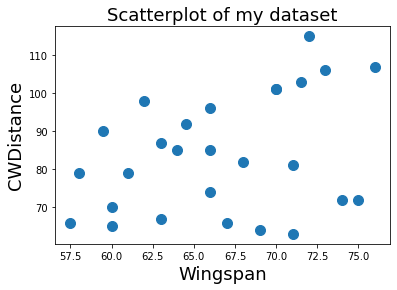

In [7]:
plt.scatter(data.Wingspan, data.CWDistance, s=100)
plt.title('Scatterplot of my dataset', fontsize=18)
plt.xlabel('Wingspan', fontsize=18)
plt.ylabel('CWDistance', fontsize=18)

plt.show

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

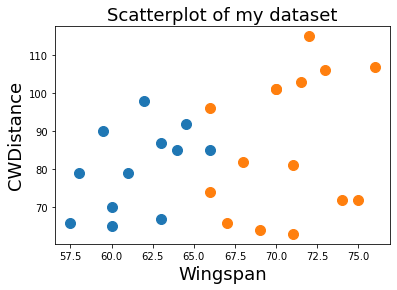

In [8]:
df1= data[data.GenderGroup==1]
df2= data[data.GenderGroup==2]

plt.scatter(df1.Wingspan, df1.CWDistance, s=100)
plt.scatter(df2.Wingspan, df2.CWDistance, s=100)

plt.title('Scatterplot of my dataset', fontsize=18)
plt.xlabel('Wingspan', fontsize=18)
plt.ylabel('CWDistance', fontsize=18)

plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [9]:
from sklearn.cluster import KMeans

k= 2

#crear objeto para hacer kmeans y definir clusters

km= KMeans(n_clusters=k)

#Do kmeans

clusters = km.fit_predict(data[['Wingspan', 'CWDistance']])

clusters

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
data['cluster1']= clusters

data

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit_predict(data[['Wingspan', 'CWDistance']])
    sse.append(km.inertia_)

In [ ]:
print(k_rng)
print(sse)

In [ ]:
plt.plot(k_rng, sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot


5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?